# Preprocesado 

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv("../regresion_logistica/ficheros/loan_limpio_menores.csv")
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,128.0,largo,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,largo,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,largo,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,largo,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,largo,1,Urban,Y


### Estanzarización de las variables numéricas:

In [40]:
scaler = StandardScaler()

In [41]:
numericas = df.select_dtypes(include=np.number)
numericas = numericas.drop(["credit_history","dependents"], axis=1)
numericas.head(2)

,applicantincome,coapplicantincome,loanamount
0,5849,0.0,128.0
1,4583,1508.0,128.0


In [42]:
scaler.fit(numericas)

StandardScaler()

In [43]:
x_escaladas = scaler.transform(numericas)
numericas_estandar = pd.DataFrame(x_escaladas,columns = numericas.columns)
numericas_estandar.head()

,applicantincome,coapplicantincome,loanamount
0,0.311983,-0.613757,-0.181121
1,-0.079844,-0.025836,-0.181121
2,-0.569782,-0.613757,-1.021461
3,-0.698843,0.305552,-0.289552
4,0.358718,-0.613757,-0.004921


In [44]:
df.drop(["applicantincome", "coapplicantincome", "loanamount"], axis = 1, inplace= True)
df.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,largo,1,Urban,Y
1,Male,Yes,1,Graduate,No,largo,1,Rural,N
2,Male,Yes,0,Graduate,Yes,largo,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,largo,1,Urban,Y
4,Male,No,0,Graduate,No,largo,1,Urban,Y


In [45]:
df = pd.concat([df, numericas_estandar], axis=1)
df.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area,loan_status,applicantincome,coapplicantincome,loanamount
0,Male,No,0,Graduate,No,largo,1,Urban,Y,0.311983,-0.613757,-0.181121
1,Male,Yes,1,Graduate,No,largo,1,Rural,N,-0.079844,-0.025836,-0.181121
2,Male,Yes,0,Graduate,Yes,largo,1,Urban,Y,-0.569782,-0.613757,-1.021461
3,Male,Yes,0,Not Graduate,No,largo,1,Urban,Y,-0.698843,0.305552,-0.289552
4,Male,No,0,Graduate,No,largo,1,Urban,Y,0.358718,-0.613757,-0.004921


### Codificación de las variables categóricas:

In [46]:
for col in df.select_dtypes(include = "O"):
    print(f"La columna {col} tiene los siguientes valores únicos:")
    print("------------") 
    print(df[col].value_counts())

La columna gender tiene los siguientes valores únicos:
------------
Male      413
Female     91
Name: gender, dtype: int64
La columna married tiene los siguientes valores únicos:
------------
Yes    326
No     178
Name: married, dtype: int64
La columna education tiene los siguientes valores únicos:
------------
Graduate        394
Not Graduate    110
Name: education, dtype: int64
La columna self_employed tiene los siguientes valores únicos:
------------
No     435
Yes     69
Name: self_employed, dtype: int64
La columna loan_amount_term tiene los siguientes valores únicos:
------------
largo    457
medio     40
corto      7
Name: loan_amount_term, dtype: int64
La columna property_area tiene los siguientes valores únicos:
------------
Semiurban    193
Urban        165
Rural        146
Name: property_area, dtype: int64
La columna loan_status tiene los siguientes valores únicos:
------------
Y    344
N    160
Name: loan_status, dtype: int64


Según el EDA concluimos que:

- No tienen orden: *gender*, *married*, *property_area*

- Tienen orden: *education*, *loan_plazo*, *self_employed*, *dependents*

A las columnas que tienen orden les vamos a dar los siguientes valores con el método *map*:

education:

- Graduate: 2
- Not Graduate: 1

In [47]:
mapa_edu = {"Graduate": 2, "Not Graduate": 1}
df["education"] = df["education"].map(mapa_edu)

loan_pazo:

- largo: 3
- medio: 2
- corto: 1

In [48]:
mapa_plazo = {"medio": 2, "corto": 1, "largo": 3}
df["loan_amount_term"] = df["loan_amount_term"].map(mapa_plazo)

self_employed: 

- Yes: 1
- No: 2

In [49]:
mapa_employed = {"Yes": 1, "No":2}
df["self_employed"] = df["self_employed"].map(mapa_employed)

dependents:

- 0: 3
- 1: 2
- 2: 2
- 3: 1

In [50]:
mapa_depen = {0 : 3, 1: 2, 2: 2, 3:1}
df["dependents"] = df["dependents"].map(mapa_depen)

Para las columnas que no tienen orden optamos por el método *get_dummies*:

In [51]:
lista_columnas = ["gender", "married", "property_area"]

df_encoded = pd.DataFrame()

for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [52]:
df_final = pd.concat([df,df_encoded], axis=1)
df_final.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area,loan_status,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,Male,No,3,2,2,3,1,Urban,Y,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1
1,Male,Yes,2,2,2,3,1,Rural,N,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0
2,Male,Yes,3,2,1,3,1,Urban,Y,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1
3,Male,Yes,3,1,2,3,1,Urban,Y,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1
4,Male,No,3,2,2,3,1,Urban,Y,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1


In [53]:
# borramos las columnas que ya tienen encoding

df_final.drop(["gender", "married", "property_area"], axis=1, inplace = True)

In [54]:
df_final.head()

,dependents,education,self_employed,loan_amount_term,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,2,2,3,1,Y,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1
1,2,2,2,3,1,N,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0
2,3,2,1,3,1,Y,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1
3,3,1,2,3,1,Y,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1
4,3,2,2,3,1,Y,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1


Codificamos la variable respuesta, *loan_status* con map como:

- 0: N
- 1: Y

In [55]:
mapa_loan = {'N':0,'Y':1}
df_final["loan_status"] = df_final["loan_status"].map(mapa_loan)

In [56]:
df_final.head(2)

,dependents,education,self_employed,loan_amount_term,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,3,2,2,3,1,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1
1,2,2,2,3,1,0,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0


In [57]:
df_final.to_csv("../regresion_logistica/ficheros/loan_ecoding_estandar.csv", index = False)

### Comprobamos si nuestros datos están balanceados:

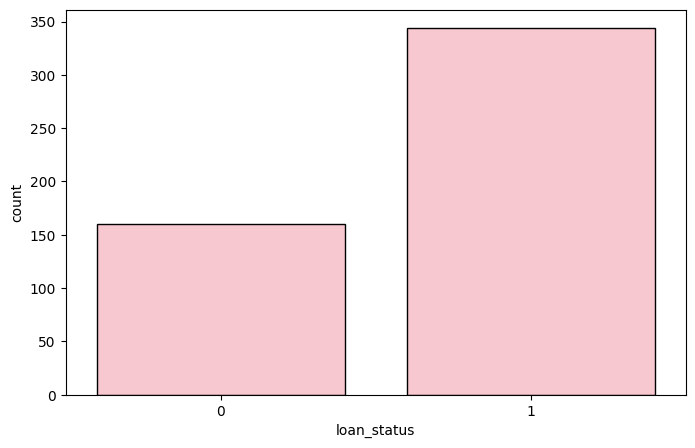

In [58]:
plt.figure(figsize=(8,5)) 
fig1 = sns.countplot(data = df_final, x = "loan_status",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["0", "1"])
plt.show()

Nuestros datos están desequilibrados, ya que hay más créditos concedidos que denegados.

Los balanceamos usando Upsampling con imblearn:

In [59]:
X = df_final.drop("loan_status", axis = 1)
y = df_final["loan_status"]

In [60]:
upp = RandomOverSampler()

In [61]:
X_upp, y_upp = upp.fit_resample(X,y)

In [62]:
y_upp.value_counts()

1    344
0    344
Name: loan_status, dtype: int64

In [63]:
balanceado_final = pd.concat([X_upp, y_upp], axis = 1)
balanceado_final.head()

,dependents,education,self_employed,loan_amount_term,credit_history,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,3,2,2,3,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1,1
1,2,2,2,3,1,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0,0
2,3,2,1,3,1,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1,1
3,3,1,2,3,1,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1,1
4,3,2,2,3,1,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1,1


In [64]:
# guardamos el archivo limpio, codificado y con los datos balanceados:
balanceado_final.to_csv('../regresion_logistica/ficheros/loan_balanceado.csv')